## Scikit-learn PCA

In [17]:
# scikit-learn's version of PCA
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
iris = load_iris()

In [5]:
X = iris.data
y = iris.target

In [6]:
pca = PCA(n_components=2)

In [7]:
# fit the PCA to our data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Let's take a look at some of the attributes of the PCA object to see if they match up with what we achieved in our manual process. Let's take a look at the components_ attribute of our object to see if this matches up without the top_2_eigenvectors variable:

In [8]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

Our two components match, almost exactly, our previous variable, top_2_eigenvectors. We say almost because the second component is actually the negative of the eigenvector we calculated. This is fine because, mathematically, both eigenvectors are 100% valid and still achieve the primary goal of creating uncorrelated columns.

So far, this process is much less painful than what we were doing before. To complete the process, we need to use the transform method of the PCA object to project data onto our new two-dimensional plane:

In [11]:
pca.transform(X)[:5, ]
# sklearn PCA centers the data first while transforming, so these numbers won't match our manual process

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

Notice that our projected data does not match up with the projected data we got before at all. This is because the scikit-learn version of PCA automatically centers data in the prediction phase, which changes the outcome.

We can mimic this by altering a single line in our version to match:

In [ ]:
# manually centering our data to match scikit-learn's implementation of PCA
# np.dot(X - mean_vector, top_2_eigenvectors.T)[:5, ]

Let's make a quick plot of the projected iris data and compare what the dataset looks like before and after projecting onto our new coordinate system:

In [12]:
label_dict = {i: k for i, k in enumerate(iris.target_names)}
# {0: 'setosasa', 1: 'versicolor', 2: 'virginica'}

def plot(X, y, title, x_label, y_label):
    ax = plt.subplot(111)
    for label, marker, color in zip(range(3), ('^', 's', 'o'), ('blue', 'red', 'green')):
        plt.scatter(x=X[:, 0].real[y == label],
                   y=X[:, 1].real[y == label],
                   color=color, alpha=0.5,
                   label=label_dict[label])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

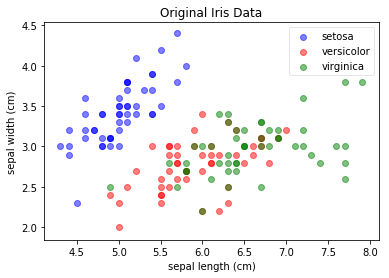

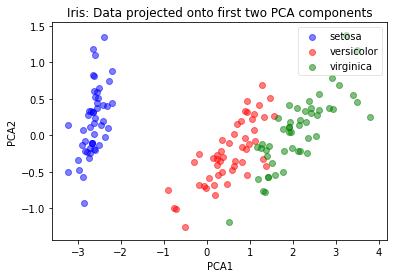

In [14]:
# Plot the original projected data
plot(X, y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")
plt.show()
plot(pca.transform(X), y, "Iris: Data projected onto first two PCA components", "PCA1", "PCA2")

In our original dataset, we can see the irises in their original feature space along the first two columns. Notice that in our projected space, the flowers are much more separated from one another and also rotated on their axis a bit. It looks like the data clusters are standing upright. This phenomenon is because our principal components are working to capture variance in our data, and it shows in our plots.

We can extract the amount of variance explained by each component as we did in our manual example:

In [15]:
# percentage of variance in data explained by each component
# same as what we calculated earlier
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

Now, that we can perform all of the basic functions with scikit-learn's PCA, let's use this information to display one of the main benefits of PCA: de-correlating features.

*By nature, in the eigenvalue decomposition procedure, the resulting principal components are perpendicular to each other, meaning that they are linearly independent of one another.

This is a major benefit because many machine learning models and preprocessing techniques make the assumption that inputted features are independent, and utilizing PCA ensures this for us.

To show this, let's create the correlation matrix of the original iris dataset and find the average linear correlation coefficient between each of the features. Then, we will do the same for a PCA projected dataset and compare the values. We expect that the average correlation of the projected dataset should be much closer to zero, implying that they are all linearly independent. 

Let's begin by calculating the correlation matrix of the original iris dataset:

It will be a 4 x 4 matrix where the values represent the correlation coefficient of every feature versus each other:

In [18]:
# show how pca attempts to eliminate dependence between columns 

# show the correlation matrix of the original dataset
np.corrcoef(X.T)

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

We will then extract all values above the diagonal of 1s to use them to find the average correlation between all of the features:

In [20]:
# correlation coefficients above the diagonal
np.corrcoef(X.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]]

array([-0.10936925,  0.87175416,  0.81795363, -0.4205161 , -0.35654409])

Finally, we will take the mean of this array:

In [27]:
# average correlation of original iris dataset.
np.corrcoef(X.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]].mean()

0.16065567094168504

The average correlation coefficient of the original features is .16, which is pretty small, but definitely not zero. Now, let's create a full PCA that captures all four principal components:

In [28]:
# capture all four principal components
full_pca = PCA(n_components=4)

# fit out PCA to the iris dataset
full_pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Once we've done this, we will use the same method as before and calculate the average correlation coefficient between the new, supposedly linearly independent columns:

In [31]:
pca_iris = full_pca.transform(X)
# average correlation of PCAed iris dataset.
np.corrcoef(pca_iris.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]].mean()
# VERY close to 0 because columns are independent from one another
# This is an important consequences of performing an eigenvalue decomposition


2.374802667843668e-16

This shows how data projected onto principal components end up having fewer correlated features, which is helpful in general in machine learning.

## How centering and scaling data affects PCA

As with many of the transformations that we have worked with previously in this text, the scaling of features tends to matter a great deal to the transformations. PCA is no different. Previously, we mentioned that the scikit-learn version of PCA automatically centers data in the prediction phase, but why doesn't it do so at the fitting time? If the scikit-learn PCA module goes through the trouble of centering data in the predict method, why doesn't it do so while calculating the eigenvectors? The hypothesis here is that centering data doesn't affect the principal components. Let's test this:

In [32]:
# import our scaling module
from sklearn.preprocessing import StandardScaler
# center our data, not a full scaling
X_centered = StandardScaler(with_std=False).fit_transform(X)

X_centered[:5,]

array([[-0.74333333,  0.446     , -2.35866667, -0.99866667],
       [-0.94333333, -0.054     , -2.35866667, -0.99866667],
       [-1.14333333,  0.146     , -2.45866667, -0.99866667],
       [-1.24333333,  0.046     , -2.25866667, -0.99866667],
       [-0.84333333,  0.546     , -2.35866667, -0.99866667]])

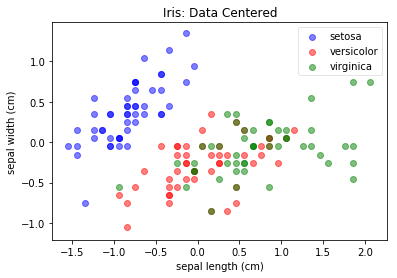

In [33]:
# Let's take a look at the now centered dataste:
# Plot our centered data
plot(X_centered, y, "Iris: Data Centered", "sepal length (cm)", "sepal width (cm)")

We can then fit the PCA class that we instanstiated before, with n_components set to 2, to our centered iris dataset:

In [34]:
# fit our PCA (with n_components still set to 2) on our centered data
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Once this is done, we can call the components_ attribute of the PCA module and compare the resulting principal components with the PCs that we got with the original iris dataset:

In [35]:
# same components as before
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

It seems that the PCs that resulted from the centered data are exactly the same as the PCs that we saw earlier. To clarify this, let's transform the centered data using the PCA module and look at the first five rows and see if they match up with the previously obtained projection:

In [36]:
# same projection when data are centered because PCA does this automatically
pca.transform(X_centered)[:5,]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

The rows match up! If we look at the graph of the projected centered data and the explained variance ratios, we will that these also match up:

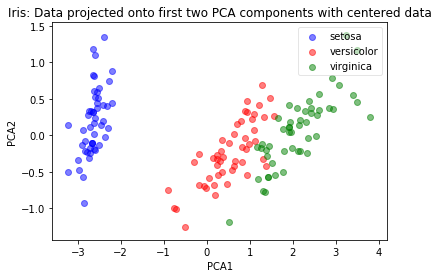

In [37]:
# Plot PCA projection of centered data, same as previous PCA projected data
plot(pca.transform(X_centered), y, "Iris: Data projected onto first two PCA components with centered data", "PCA1", "PCA2")

For percentage variance, we implement the following: 

In [38]:
# percentage of variance in data explained by each component
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

The reason this is happening is because matrices have the same covariance matrix as their centered counterparts. If two matrices have the same covariance matrix, then they will have the same eignenvalue decomposition. This is why the scikit-learn version of PCA doesn't bother to center data while finding the eigenvalues and eigenvectors, because they would have found the same ones regardless of centering, so why add an extra, unnecessary step? 

Now, let's take a look at what happens to our principal components when we scale data using standard z-score scaling:

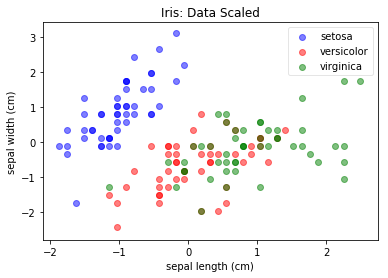

In [39]:
# doing a normal z score scaling
X_scaled = StandardScaler().fit_transform(X)

# Plot scaled data
plot(X_scaled, y, "Iris: Data Scaled", "sepal length (cm)", "sepal width (cm)")

It is worth mentioning that at this point, we have plotted the iris data in its original format, centered, and now scaled completely. In each graph, the data-points are exactly the same, but the axes are different. This is expected. Centering and scaling data doesn't change the shape of the data, but it does effect feature interaction for our feature engineering and machine learning pipelines.

Let's fit our PCA module on our newly scaled data and see if our PCs are different:

In [40]:
# fit our 2-dimensional PCA on our scaled data
pca.fit(X_scaled)

# different components as centered data
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

These are different components, as before. PCA is scale-invariant, meaning that scale affects the components. Note that when we say scaling, we mean centering and dividing by the standard deviation. Let's project our dataset onto our new components and ensure that the newly projected data is indeed different:

In [41]:
# different projection when data are scaled
pca.transform(X_scaled)[:5,]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

Finally, let's take a look at our explained variance ratios:

In [42]:
# percentage of variance in data explained by each component
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

This is interesting. Scaling our data is usually a good idea when performing feature engineering/machine learning and usually we recommend it to our readers, but why does our first component have a much lower explained variance ratio than it did before?

It's because once we scaled our data, the columns' covariance with one another became more consistent and the variance explained by each principal component was spread out instead of being solidified in a single PC. In practice and production, we generally recommend scaling, but it is a good idea to test your pipeline's performance on both scaled and un-scaled data.

Let's top off this section with a look at the projected iris data on our scaled data:

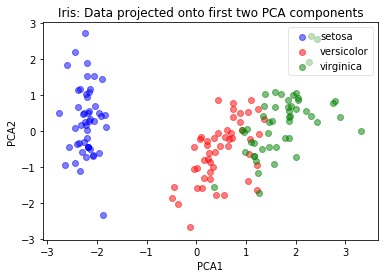

In [43]:
# Plot PCA projection of scaled data
plot(pca.transform(X_scaled), y, "Iris: Data projected onto first two PCA components", "PCA1", "PCA2")

It is subtle, but if you look at this graph and compare it to the previous plots of projected data under the original and centered data, you will notice slight differences between them.

## A deeper look into the principal components

Let's see how principal components are interpreted

Our iris dataset is a 150 x 4 matrix, and when we calculated our PCA components when n_components was set to 2, we obtained a components matrix of size 2 x 4:

In [44]:
# how to interpret and use components
pca.components_ # a 2 x 4 matrix

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

Just like in our manual example of calculating eigenvectors, the components_ attribute can be used to project data using matrix multiplication. 

We do so by multiplying our original dataset with the transpose of the components_ matrix:

In [45]:
# Multiply original matrix (150 x 4) by components transposed (4 x 2) to get new columns (150 x 2)
np.dot(X_scaled, pca.components_.T)[:5,]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

We invoke the transpose function here so that the matrix dimensions match up. What is happening at a low level is that for every row, we are calculating the dot product between the original row and each of the principal components. The results of the dot product become the elements of the new row:

In [47]:
# extract the first row of our scaled data
first_scaled_flower = X_scaled[0]

# extract the two PC's
first_pc = pca.components_[0]
second_pc = pca.components_[1]

first_scaled_flower.shape # (4,)
print(first_scaled_flower) # array([-0.90068117, 1.03205722, -1.3412724 , -1.31297673])

# same result as the first row of our matrix multiplication
np.dot(first_scaled_flower, first_pc), np.dot(first_scaled_flower, second_pc)

[-0.90068117  1.03205722 -1.3412724  -1.31297673]


(-2.264541728394903, 0.5057039027737824)

Luckily, we can rely on the built-in transform method to do this work for us:

In [48]:
# This is how the transform method works in pca instead of the manual way using np.dot
pca.transform(X_scaled)[:5,]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

Put another way, we can interpret each component as being a combination of the original columns. In this case, our first principal component is:

In [49]:
pca.components_[0]

array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])

The first scaled flower is:

In [50]:
first_scaled_flower

array([-0.90068117,  1.03205722, -1.3412724 , -1.31297673])

To get the first element of the first row of our projected data, we can use the following formula:

(0.52237162 * 0.90068117) + (-0.26335492 * 1.03205722) + (0.58125401 * -1.3412724) + (0.56561105 - 1.31297673) = -2.26454173

In fact, in general, for any flower with the coordinates (a, b, c, d), where a is the sepal length of the iris, b the sepal width, c the petal length, and d the petal width (this order was taken from iris.feature_names from before), the first value of the new coordinate system can be calculated by the following:

0.52237162a - 0.26335492b + 0.58125401c + 0.56561105d

Let's take this a step further and visualize the components in space alongside our data. We will truncate our original data to only keep two of its original features, sepal length and sepal width. The reason we are doing this is so that we can visualize the data easier without having to worry about four dimensions:

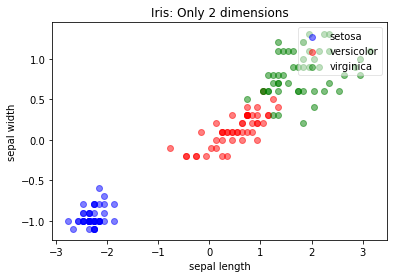

In [56]:
# cut our last two columns of the original iris dataset 
iris_2_dim = X[:, 2:4]

# center the data
iris_2_dim = iris_2_dim - iris_2_dim.mean(axis=0)

plot(iris_2_dim, y, "Iris: Only 2 dimensions", "sepal length", "sepal width")

We can see a cluster of flowers <b>(setosas)</b> on the bottom left and a larger cluster of both <b>versicolor</b> and <b>virginicia</b> flowers on the top right. It appears obvious right away that the data, as a whole, is stretched along a diagonal line stemming from the bottom left to the top right. The hope is that our principal components also pick up on this and rearrange our data accordingly.

Let's instantiate a PCA class that keeps two principal components and then use that class to transform our truncated iris data into new columns:

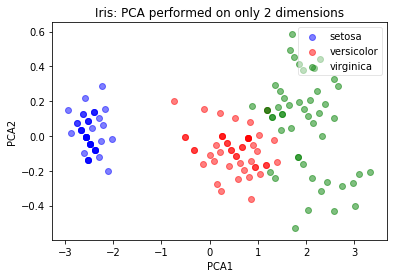

In [58]:
# instantiate a PCA of 2 components
twodim_pca = PCA(n_components=2)

# fit and transform our truncated iris data
iris_2_dim_transformed = twodim_pca.fit_transform(iris_2_dim)

plot(iris_2_dim_transformed, y, "Iris: PCA performed on only 2 dimensions", "PCA1", "PCA2")

<b>PCA 1</b>, our first principal component, should be carrying the majority of the variance within it, which is why the projected data is spread out mostly across the new x axis. Notice how the scale of the x axis is between -3 and 3 while the y axis is only between -0.4 and 0.6. To further clarify this, the following code block will graph both the original and projected iris scatter plots, as well as an overlay the principal components of twodim_pca on top of them, in both the original coordinate system as well as the new coordinate system.

The goal is to interpret the components as being guiding vectors, showing the way in which the data is moving and showing how these guiding vectors become perpendicular coordinate systems:

In [ ]:
# This code is graphing both the original iris data and the projected version of it using PCA.
 # Moreover, on each graph, the principal components are graphed as vectors on the data themselves
 # The longer of the arrows is meant to describe the first principal component and
 # the shorter of the arrows describes the second principal component
 def draw_vector(v0, v1, ax):
 arrowprops=dict(arrowstyle='->',linewidth=2,
 shrinkA=0, shrinkB=0)
 ax.annotate('', v1, v0, arrowprops=arrowprops)
 
 fig, ax = plt.subplots(2, 1, figsize=(10, 10))
 fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
 
 # plot data
 ax[0].scatter(iris_2_dim[:, 0], iris_2_dim[:, 1], alpha=0.2)
 for length, vector in zip(twodim_pca.explained_variance_, twodim_pca.components_):
 v = vector * np.sqrt(length) # elongdate vector to match up to explained_variance
 draw_vector(twodim_pca.mean_,
 twodim_pca.mean_ + v, ax=ax[0])
 ax[0].set(xlabel='x', ylabel='y', title='Original Iris Dataset',
 xlim=(-3, 3), ylim=(-2, 2))
 
 
 ax[1].scatter(iris_2_dim_transformed[:, 0], iris_2_dim_transformed[:, 1], alpha=0.2)
 for length, vector in zip(twodim_pca.explained_variance_, twodim_pca.components_):
 transformed_component = twodim_pca.transform([vector])[0] # transform components to new coordinate system
 v = transformed_component * np.sqrt(length) # elongdate vector to match up to explained_variance
 draw_vector(iris_2_dim_transformed.mean(axis=0),
 iris_2_dim_transformed.mean(axis=0) + v, ax=ax[1])
 ax[1].set(xlabel='component 1', ylabel='component 2',
 title='Projected Data',
 xlim=(-3, 3), ylim=(-1, 1))
 

[(-1, 1),
 Text(0,0.5,'component 2'),
 (-3, 3),
 Text(0.5,0,'component 1'),
 Text(0.5,1,'Projected Data')]

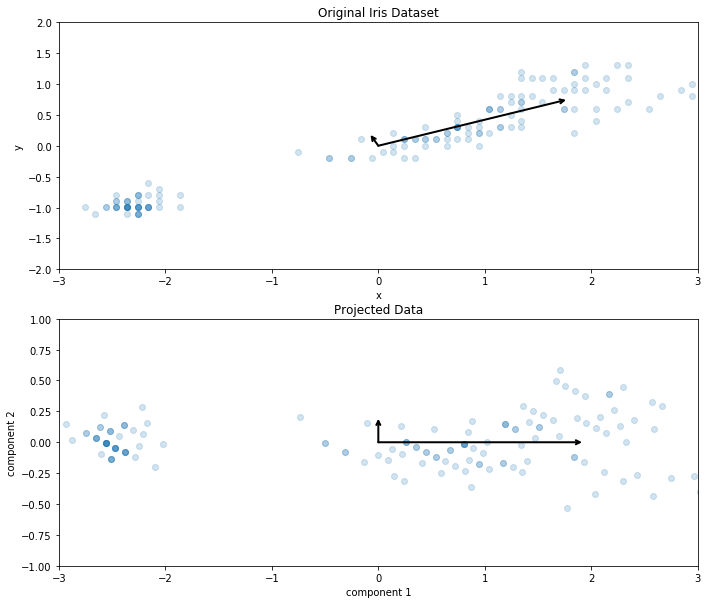

In [60]:
# This code is graphing both the original iris data and the projected version of it using PCA.
# Moreover, on each graph, the principal components are graphed as vectors on the data themselves
# The longer of the arrows is meant to describe the first principal component and
# the shorter of the arrows describes the second principal component

def draw_vector(v0, v1, ax):
    arrowprops = dict(arrowstyle='->', linewidth=2,
                     shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(iris_2_dim[:, 0], iris_2_dim[:, 1], alpha=0.2)
for length, vector in zip(twodim_pca.explained_variance_, twodim_pca.components_):
    v = vector * np.sqrt(length) # elongdate vector to match up to explained_variance
    draw_vector(twodim_pca.mean_,
               twodim_pca.mean_ + v, ax=ax[0])

ax[0].set(xlabel='x', ylabel='y', title='Original Iris Dataset',
         xlim=(-3, 3), ylim=(-2, 2))

ax[1].scatter(iris_2_dim_transformed[:, 0], iris_2_dim_transformed[:, 1], alpha=0.2)
for length, vector in zip(twodim_pca.explained_variance_,  twodim_pca.components_):
    transformed_component = twodim_pca.transform([vector])[0] # transform components to new coordinate system
    v = transformed_component * np.sqrt(length) # elongdate vector to match up to explained_variance
    draw_vector(iris_2_dim_transformed.mean(axis=0),
               iris_2_dim_transformed.mean(axis=0) + v, ax=ax[1])
ax[1].set(xlabel='component 1', ylabel='component 2',
         title='Projected Data',
         xlim=(-3, 3), ylim=(-1, 1))
# This is the Original Iris Dataset and Projected Data using PCA:

The top graph is showing the principal components as they exist in the original data's axis system. They are not perpendicular and they are pointing in the direction that the data naturally follows. We can see that the longer of the two vectors, the first principal component, is clearly following that diagonal direction that the iris data is following the most.

The secondary principal component is pointing in a direction of variance that explains a portion of the shape of the data, but not all of it. The bottom graph shows the projected iris data onto these new components accompanied by the same components, but acting as perpendicular coordinate systems. They have become the new x and y axes.

The PCA is a feature transformation tool that allows us to construct brand new super-features as linear combinations of previous features. We have seen that these components carry the maximum amount of variance within them, and act as new coordinate systems for our data. Our next feature transformation algorithm is similar in that it, too, will extract components from our data, but it does so in a machine learning-type manner.